In [147]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [184]:
class Grid:
    def __init__(self,xDim,yDim):
        self.xDim = xDim
        self.yDim = yDim
        self.states = [(x,y) for x in range(xDim) for y in range(yDim)]
        self.stateValues = {}
        self.actions = ["left","right","up","down"]
        self.rewards = {"terminal":0,
                        "nonTerminal":-1}
        self.terminalStates = [(0,0),(self.xDim-1,self.yDim-1)]

    def startStateValues(self):
        for state in self.states:
                if state == (0,0) or state == (self.xDim-1,self.yDim-1):
                    self.stateValues[state] = 0
                else:   
                    self.stateValues[state] = random.random()

    def calcRewardState_probability_basedOn_stateAction(self,newState,reward,state,action):
        if newState in self.terminalStates or (newState not in self.terminalStates and reward == 0):
            return 0
        if newState != self.simulateAction(state,action):
            return 0
        return 1
        
    def simulateAction(self, state, action):
        state = list(state)
        if action == "up":
            state[1] -= 1 if state[1] > 0 else 0
        elif action == "down":
            state[1] += 1 if state[1] < self.yDim - 1 else 0
        elif action == "right":
            state[0] += 1 if state[0] < self.xDim - 1 else 0
        elif action == "left":
            state[0] -= 1 if state[0] > 0 else 0
        return tuple(state)
 
    def updateStateValue(self,state,gamma):
        if state in self.terminalStates:
            return 0
        stateValue = 0
        for action in self.actions:
            p_a_s = 1/len(self.actions)
            value = 0
            for newState in self.states:
                for reward in self.rewards.values():
                    value += self.calcRewardState_probability_basedOn_stateAction(newState,reward,state,action)*(reward+gamma*self.stateValues[newState])
            stateValue += p_a_s*value
        self.stateValues[state] = stateValue
        return stateValue

    def updateAllStateValues(self,gamma):
        for state in self.states:
            self.updateStateValue(state,gamma)

    def getArray(self):
        data_array = np.zeros((self.yDim, self.xDim))
        for (x, y), value in self.stateValues.items():
            data_array[y, x] = value
        return data_array
    

In [189]:
std_reward = -1
gamma = 1

grid = Grid(4,4)
grid.startStateValues()
for _ in range(100):
    grid.updateAllStateValues(gamma)
print(grid.stateValues)

{(0, 0): 0, (0, 1): -12.997721997424993, (0, 2): -18.99672506649388, (0, 3): -20.996395328582274, (1, 0): -12.99772199741333, (1, 1): -16.997204591939695, (1, 2): -18.996964829216786, (1, 3): -18.996999534564395, (2, 0): -18.996725066468244, (2, 1): -18.996964829203968, (2, 2): -16.997438871585178, (2, 3): -12.998087830028553, (3, 0): -20.99639532854806, (3, 1): -18.996999534543896, (3, 2): -12.998087830021099, (3, 3): 0}


Text(195.72222222222223, 0.5, 'Y-position')

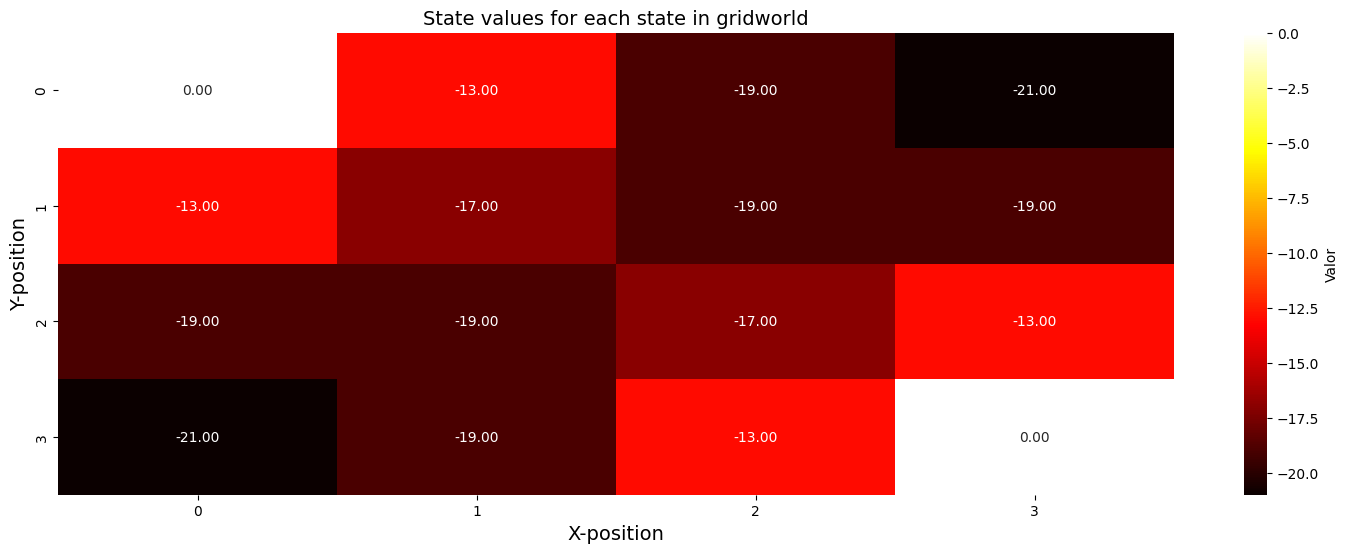

In [190]:
plt.figure(figsize=(18, 6))
sns.heatmap(grid.getArray(), cmap='hot', annot=True, fmt='.2f', cbar_kws={'label': 'Valor'})
plt.title('State values for each state in gridworld',fontsize = 14)
plt.xlabel('X-position',fontsize = 14)
plt.ylabel('Y-position',fontsize = 14)